This is a iPython Notebook document, associated to the Support Information of the manuscript:
# PALMA, an improved algorithm for the DOSY signal processing
Afef cherni, Émilie chouzenoux, Marc-André Delsuc 


# S1

# we use the following approximation :
$$
W(e^x) \approx x\left(1-\frac{\log x}{1+x} \right)
$$
see  W. Börsh-Supan, *J. Res. Nat. Bur. Stand.* **65B**, 245 (1961)
( http://math.stackexchange.com/questions/463055/approximation-to-the-lambert-w-function )

In [1]:
#############################
#Import bib
##############################
import numpy as np
import scipy
from scipy.special import lambertw
import matplotlib.pylab as plt
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import time
%matplotlib inline
import scene
import PALMA
from IPython.display import HTML, display_html, Latex, display_latex
import pandas as pd

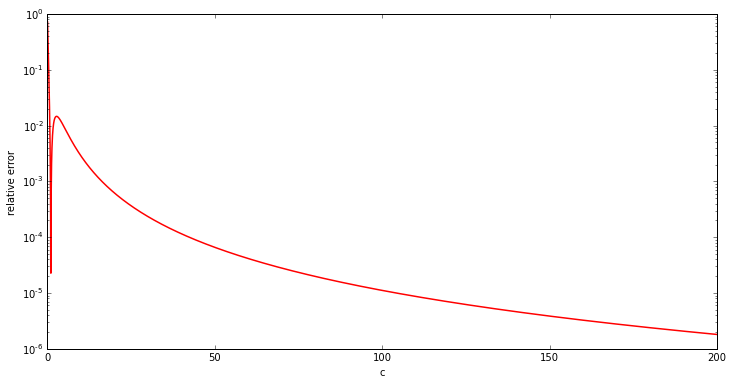

In [2]:
def W(x):
    """
    W Lambert function
    """
    d = scipy.special.lambertw(x, k=0, tol=1e-8)
    return np.real(d)

def approx(x):
    s = x*(1 - np.log(x)/(1+x))
    return s
plt.figure(figsize=(12,6))
c = np.linspace(-4,200,5000)
yl = abs(W(np.exp(c))-approx(c)) / W(np.exp(c))
plt.semilogy(c, yl, 'r', linewidth=1.5)
plt.ylabel("relative error")
plt.xlabel("c")
#plt.savefig('S1.eps', format='eps', dpi=1000)

# S2

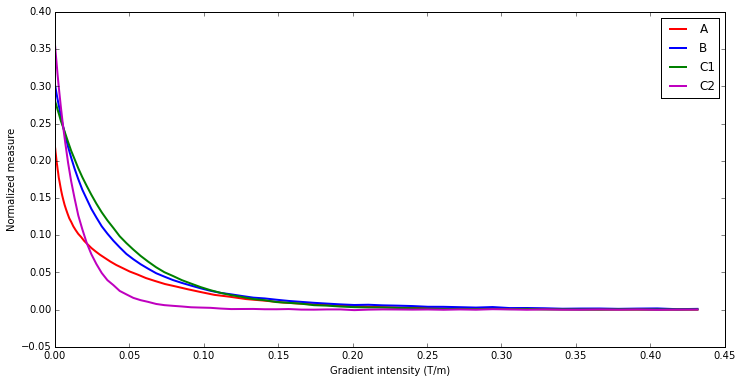

In [3]:
##############################
#Measurement parameter
##############################
N = 256
M = 64
delta = 2E-3
Delta = 50E-3
Dmin = 1.0
Dmax = 1000.0
D= 16
noise = 0.001 #noise = 0.1%
##############################
#Measurement of Signal A
##############################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
tA = scene.t_exp(D, Delta, invshift=10)
tA = tA.reshape((M,1))
KA = np.exp(-np.kron(tA,Lap_axis.T))
xA = scene.scene_Kazi(N, Dmin, Dmax)
xA = xA.reshape((N,1))
zA = np.dot(KA,xA) 
sigmaA = noise*zA[0]
yA = zA + sigmaA*np.random.randn(M,1)
##############################
#Measurement of Signal B
##############################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
tB = scene.t_linear(D, Delta)
tB = tB.reshape((M,1))
KB = np.exp(-np.kron(tB,Lap_axis.T))
xB = scene.scene_Gauss(N)
xB = xB.reshape((N,1))
zB = np.dot(KB,xB) 
sigmaB = noise*zB[0]
yB = zB + sigmaB*np.random.randn(M,1)
##############################
#Measurement of Signal C1
##############################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
tC = scene.t_linear(D, Delta)
tC = tC.reshape((M,1))
KC = np.exp(-np.kron(tC,Lap_axis.T))
#C1
xC1 = scene.scene_Xu(N, Dmin, Dmax, width=4)
xC1 = xC1.reshape((N,1))
zC1 = np.dot(KC,xC1) 
sigmaC1 = noise*zC1[0]
yC1 = zC1 + sigmaC1*np.random.randn(M,1)
##############################
#Measurement of Signal C2
##############################
xC2 = scene.scene_Xu_ass(N, Dmin, Dmax, width=4)
xC2 = xC2.reshape((N,1))
zC2 = np.dot(KC,xC2) 
sigmaC2 = noise*zC2[0]
yC2 = zC2 + sigmaC2*np.random.randn(M,1)
# Graphic
plt.figure(figsize=(12,6))
plt.plot(tA, yA/np.linalg.norm(yA,2), 'r', linewidth= 2, label='A')
plt.plot(tB, yB/np.linalg.norm(yB,2), 'b', linewidth= 2, label='B')
plt.plot(tC, yC1/np.linalg.norm(yC1,2), 'g', linewidth= 2, label='C1')
plt.plot(tC, yC2/np.linalg.norm(yC2,2), 'm', linewidth= 2, label='C2')
plt.legend()
plt.xlabel('Gradient intensity (T/m)')
plt.ylabel('Normalized measure')
plt.legend(loc=1)
plt.show()
#plt.savefig('S2.eps', format='eps', dpi=1000)

# S3

PDI of A= 19.2606894039


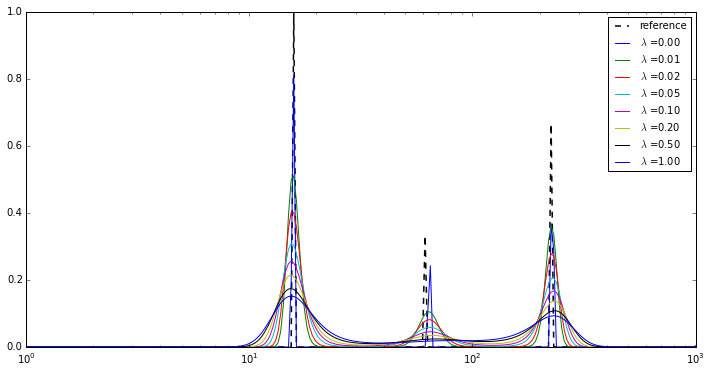

,$\lambda$,Quality reconstruction in $dB$,PDI
0,0.00,5.653731,14.021350
1,0.01,1.059681,18.841140
2,0.02,0.806358,18.932501
3,0.05,0.589224,19.104383
4,0.10,0.476451,19.259437
5,0.20,0.391667,19.423242
6,0.50,0.309949,19.649537
7,1.00,0.265881,19.840430


In [10]:
##############################
#Measurement
##############################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
t = scene.t_exp(D, Delta, invshift=10)
t = t.reshape((M,1))
K = np.exp(-np.kron(t,Lap_axis.T))
Kt = np.transpose(K)
KtK = np.dot(Kt,K)
B = np.identity(N)
B = B + KtK
Binv = np.linalg.inv(B)
x = scene.scene_Kazi(N, Dmin, Dmax)
x = x.reshape((N,1))
z = np.dot(K,x) 
sigma = noise*z[0]
np.random.seed(3333)
y = z + sigma*np.random.randn(M,1)
eta = 1.01*np.sqrt(M)*sigma
##############################
#PDI coefficient of signal B
##############################
pdi_A = scene.PDI(x, N, Dmin , Dmax)
print 'PDI of A=', pdi_A
##############################
#Algorithm paramter
##############################
nbiter = 200000
prec = 1E-14
full_output = False
##############################
#Algorithm parameter
##############################
Qlt = []
PDI = []
LamdaList = [0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
plt.figure(figsize=(12,6))
plt.semilogx(Lap_axis,np.abs(x), "k--", linewidth = 1.5, label = "reference")
coeff = 1
for lamda in LamdaList:
    #Reconstruction of the signal
    x_n, criters = PALMA.PPXAplus(K, Binv, y, eta, nbiter, lamda, prec, full_output)
    #Plot of recovered signal
    plt.semilogx(Lap_axis,np.abs(x_n)*coeff, "-", linewidth = 1, label = r"$\lambda$ =%.2f" % lamda)
    plt.legend(loc=1,prop={'size':10})
    #Quality reconstruction
    error =  np.linalg.norm(x_n-x,2) / np.linalg.norm(x)   
    quality = -20*np.log10(error) 
    Qlt.append(quality)
    #PDI coeff
    pdi = scene.PDI(x_n, N, Dmin, Dmax)
    PDI.append(pdi)
    coeff = 3
tab = pd.DataFrame()
tab["$\lambda$"]= list(LamdaList)
tab["Quality reconstruction in $dB$"] = list(Qlt)
tab["PDI"]= list(PDI)
tab

# S4

PDI of B= 6.25938409451


,$\lambda$,Quality reconstruction in $dB$,PDI
0,0.00,-9.593472,4.525813
1,0.01,28.571631,5.328784
2,0.02,31.878292,5.781754
3,0.05,32.510611,7.923702
4,0.10,31.112190,12.295607
5,0.20,31.179153,15.244679
6,0.50,31.449385,16.827202
7,1.00,31.556082,17.328788


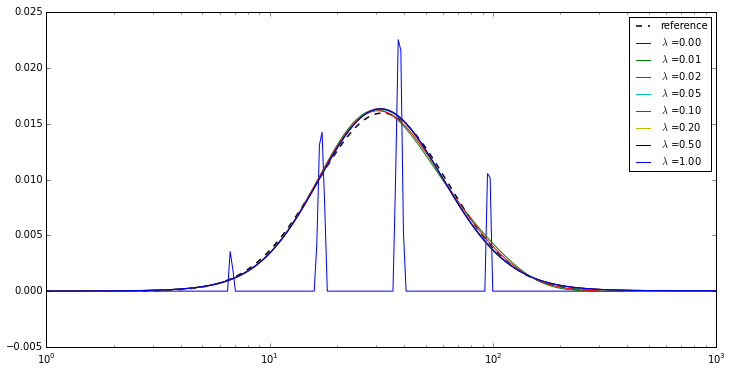

In [11]:
##############################
#Measurement of B signal
##############################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
t = scene.t_exp(D, Delta, invshift=10)
t = t.reshape((M,1))
K = np.exp(-np.kron(t,Lap_axis.T))
Kt = np.transpose(K)
KtK = np.dot(Kt,K)
B = np.identity(N)
B = B + KtK
Binv = np.linalg.inv(B)
x = scene.scene_Gauss(N)
x = x.reshape((N,1))
z = np.dot(K,x) 
sigma = noise*z[0]
np.random.seed(1234)
y = z + sigma*np.random.randn(M,1)
eta = 1.01*np.sqrt(M)*sigma
##############################
#PDI coefficient of signal B
##############################
pdi_B = scene.PDI(xB, N, Dmin , Dmax)
print 'PDI of B=', pdi_B
##############################
#Algorithm paramter
##############################
nbiter = 100000
prec = 1E-14
full_output = False
##############################
#Signal reconstruction
##############################
Qlt = []
PDI = []
LamdaList = [0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
plt.figure(figsize=(12,6))
plt.semilogx(Lap_axis,np.abs(x), "k--", linewidth = 1.5, label = "reference")
coeff = 8
for lamda in LamdaList:
    #Reconstruction of the signal
    x_n, criters = PALMA.PPXAplus(K, Binv, y, eta, nbiter, lamda, prec, full_output)
    #Plot of recovered signal
    plt.semilogx(Lap_axis,x_n/coeff, "-", linewidth = 1, label = r"$\lambda$ =%.2f" % lamda)
    plt.legend(loc=1,prop={'size':10})
    error =  np.linalg.norm(x_n-x,2) / np.linalg.norm(x)    
    quality = -20*np.log10(error) 
    Qlt.append(quality)
    #PDI coeff
    pdi = scene.PDI(x_n, N, Dmin, Dmax)
    PDI.append(pdi)
    coeff = 1
tab = pd.DataFrame()
tab["$\lambda$"]= list(LamdaList)
tab["Quality reconstruction in $dB$"] = list(Qlt)
tab["PDI"]= list(PDI)
plt.savefig('S4.eps', format='eps', dpi=1000)
tab

# S5 

PDI of C1= 1.79150742463


,$\lambda$,Quality reconstruction in $dB$,PDI
0,0.00,-8.201228,1.501091
1,0.01,15.222507,1.686517
2,0.02,13.755935,1.759840
3,0.05,12.804600,2.193182
4,0.10,12.349421,4.318494
5,0.20,11.814342,9.783354
6,0.50,11.195797,16.562481
7,1.00,10.981773,17.289471


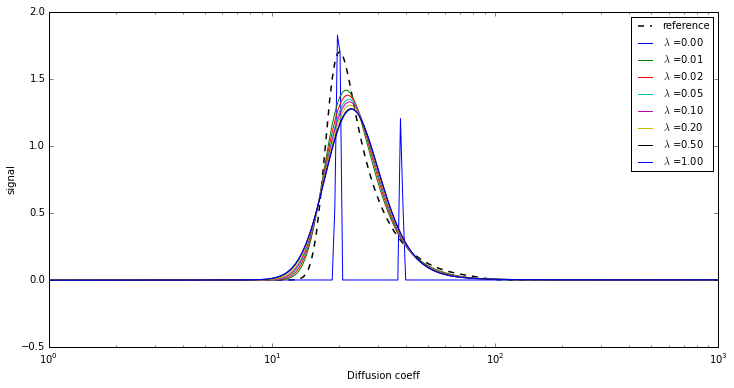

In [12]:
################################
# Measurement of C1 signal
################################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
t = scene.t_linear(D, Delta, N=64)
t = t.reshape((M,1))
K = np.exp(-np.kron(t,Lap_axis.T))
Kt = np.transpose(K)
KtK = np.dot(Kt,K)
B = np.identity(N)
B = B + KtK
Binv = np.linalg.inv(B)
np.random.seed(1234)
#C1
xC1 = scene.scene_Xu(N, Dmin, Dmax, width=4)
xC1 = xC1.reshape((N,1))
zC1 = np.dot(K,xC1) 
sigmaC1 = noise*zC1[0]
yC1 = zC1 + sigmaC1*np.random.randn(M,1)
etaC1 = 1.01*np.sqrt(M)*sigmaC1
##############################
#PDI coefficient of signal C1
##############################
pdi_C1 = scene.PDI(xC1, N, Dmin , Dmax)
print 'PDI of C1=', pdi_C1
##############################
#Algorithm paramter
##############################
nbiter = 100000
prec = 1E-14
full_output = False
##############################
#Signal reconstruction
##############################
Qlt_C1 = []
PDI_C1 = []
LamdaList = [0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
plt.figure(figsize=(12,6))
plt.semilogx(Lap_axis,np.abs(xC1), "k--", linewidth = 1.5, label = "reference")
coeff = 6
for lamda in LamdaList:
    #Reconstruction of the signal
    x_nC1, criters = PALMA.PPXAplus(K, Binv, yC1, etaC1, nbiter, lamda, prec, full_output)
    #Plot of recovered signal C1
    plt.semilogx(Lap_axis,x_nC1/coeff, linewidth = 1, label = r"$\lambda$ =%.2f" % lamda)
    plt.xlabel('Diffusion coeff')
    plt.ylabel('signal')
    plt.legend(loc=1, fontsize=10)
    error1 =  np.linalg.norm(x_nC1-xC1,2) / np.linalg.norm(xC1)    
    quality1 = -20*np.log10(error1) 
    Qlt_C1.append(quality1)
    #PDI coeff
    pdi = scene.PDI(x_nC1, N, Dmin, Dmax)
    PDI_C1.append(pdi)
    coeff = 1
tab = pd.DataFrame()
tab["$\lambda$"]= list(LamdaList)
tab["Quality reconstruction in $dB$"] = list(Qlt_C1)
tab["PDI"]= list(PDI_C1)
plt.savefig('S5.eps', format='eps', dpi=1000)
tab

# S6

PDI of C2= 1.31678084801


,$\lambda$,Quality reconstruction in $dB$,PDI
0,0.00,-7.626039,1.267951
1,0.01,12.734046,1.365426
2,0.02,11.618082,1.402225
3,0.05,10.974348,1.435219
4,0.10,10.871501,1.440965
5,0.20,10.827276,1.441492
6,0.50,10.759540,1.414618
7,1.00,10.627078,1.272134


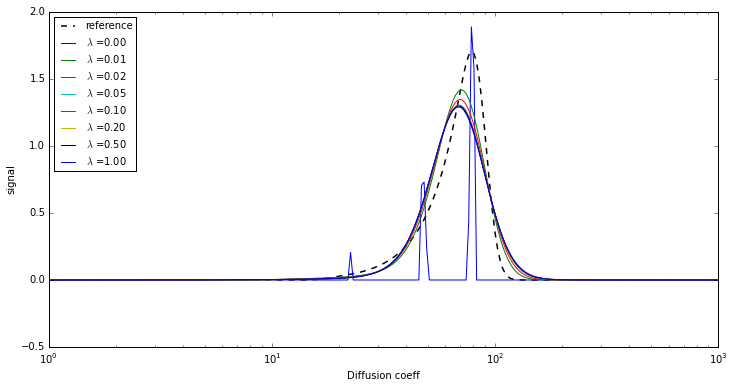

In [13]:
##############################
# Measurement of C2 signal 
##############################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
t = scene.t_linear(D, Delta, N=64)
t = t.reshape((M,1))
K = np.exp(-np.kron(t,Lap_axis.T))
Kt = np.transpose(K)
KtK = np.dot(Kt,K)
B = np.identity(N)
B = B + KtK
Binv = np.linalg.inv(B)
np.random.seed(1234)
#C2
xC2 = scene.scene_Xu_ass(N, Dmin, Dmax, width=4)
xC2 = xC2.reshape((N,1))
zC2 = np.dot(K,xC2) 
sigmaC2 = noise*zC2[0]
yC2 = zC2 + sigmaC2*np.random.randn(M,1)
etaC2 = 1.01*np.sqrt(M)*sigmaC2
##############################
#PDI coefficient of signal C2
##############################
pdi_C2 = scene.PDI(xC2, N, Dmin , Dmax)
print 'PDI of C2=', pdi_C2
##############################
#Signal reconstruction
##############################
LamdaList = [0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
Qlt_C2 = []
PDI_C2 = []
plt.figure(figsize=(12,6))
plt.semilogx(Lap_axis,np.abs(xC2), "k--", linewidth = 1.5, label = "reference")
coeff = 6
for lamda in LamdaList:
    #Reconstruction of the signal
    x_n2, criters = PALMA.PPXAplus(K, Binv, yC2, etaC2, nbiter, lamda, prec, full_output)
    #Plot of recovered signal C2
    plt.semilogx(Lap_axis,x_n2/coeff, linewidth = 1,  label = r"$\lambda$ =%.2f" % lamda)
    plt.xlabel('Diffusion coeff')
    plt.ylabel('signal')
    plt.legend(loc=2, fontsize=10)
    error2 =  np.linalg.norm(x_n2-xC2,2) / np.linalg.norm(xC2)   
    quality2 = -20*np.log10(error2) 
    Qlt_C2.append(quality2)
    #PDI coeff
    pdi = scene.PDI(x_n2, N, Dmin, Dmax)
    PDI_C2.append(pdi)
    coeff = 1
tab = pd.DataFrame()
tab["$\lambda$"]= list(LamdaList)
tab["Quality reconstruction in $dB$"] = list(Qlt_C2)
tab["PDI"]= list(PDI_C2)
plt.savefig('S6.eps', format='eps', dpi=1000)
tab